### Light GBM
##### XGBoost'un eğitim süresi performansını arttırmaya yönelik geliştirilen bir diğer GBM türüdür.
###### Daha performanslı
###### Level-wise(yatay) büyüme stratejisi yerine Leaf-wise(dikey) büyüme stratejisi izliyor.
###### Breadth-first search(BFS) yerine depth-first search(DFS)
###### XGBoost karar ağaçlarına odaklanırken, Light GBM ağaçların kendilerine(splitlerine) odaklanır.

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### Model & Prediction

In [5]:
from lightgbm import LGBMClassifier

In [6]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [7]:
y_pred = lgbm_model.predict(X_test)

In [8]:
accuracy_score(y_test, y_pred)

0.7229437229437229

#### Model Tuning

In [9]:
lgbm = LGBMClassifier()

In [10]:
lgbm_params = {"learning_rate": [0.001, 0.01, 0.1],
               "n_estimators": [200, 500, 1000],
               "max_depth": [1, 2, 35, 8]}

In [11]:
lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


In [12]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}

In [13]:
lgbm_tuned = LGBMClassifier(learning_rate=0.01, max_depth=1, n_estimators=500).fit(X_train, y_train)

In [14]:
y_pred = lgbm_tuned.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred)

0.7575757575757576

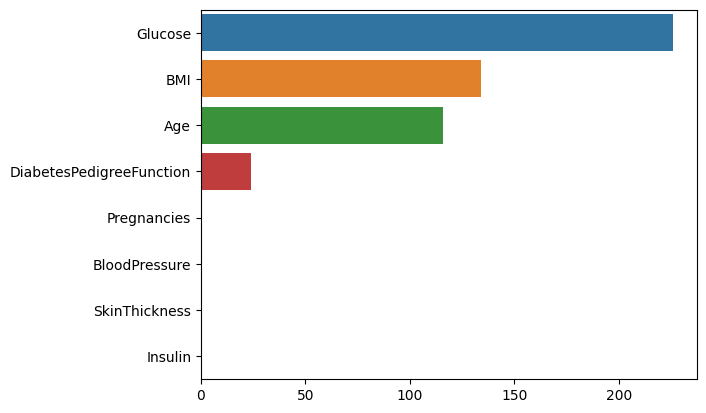

In [18]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index);